In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statistics
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelBinarizer,StandardScaler,OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
from sklearn.linear_model import LogisticRegression,RidgeClassifier,PassiveAggressiveClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import plot_importance
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import joblib
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from fancyimpute import KNN,SoftImpute

In [5]:
data=pd.read_csv('LoansTrainingSetV2.csv',low_memory=False)

In [6]:
data.shape

(111107, 19)

In [7]:
data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [8]:
data.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,Loan Given,15654,Long Term,686.0,10+ years,Rent,43050.0,Debt Consolidation,889.69,14.1,49.0,18,0,14730,29757,0.0,0.0
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,Loan Given,15237,Short Term,706.0,10+ years,Home Mortgage,60948.0,Debt Consolidation,700.9,15.9,48.0,11,0,17733,23060,0.0,0.0
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,Loan Given,10413,Short Term,719.0,5 years,Home Mortgage,66945.0,Debt Consolidation,1210.59,8.7,NaN,11,0,5205,6348,0.0,0.0
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Loan Given,34447,Short Term,626.0,10+ years,Home Mortgage,78736.0,Debt Consolidation,1476.3,30.4,9.0,12,0,32318,37580,0.0,0.0
111106,f83ae0e1-bd30-46c7-9f72-f4f9fe2f36ca,74187e35-39c2-4010-ae0d-8bcd0544189e,Loan Given,9209,Long Term,708.0,< 1 year,Own Home,123454.0,Debt Consolidation,668.71,20.1,16.0,8,0,6835,9261,0.0,0.0


<AxesSubplot:xlabel='Loan Status', ylabel='count'>

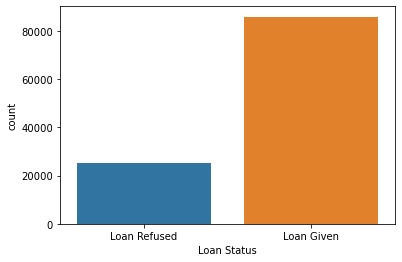

In [9]:
sns.countplot(data['Loan Status'])

In [10]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,1.111070e+05,89769.000000,8.976900e+04,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,110879.00000,111096.000000
mean,1.147718e+07,1075.795029,7.248600e+04,18.201003,34.902272,11.125105,0.168027,1.548314e+04,0.11766,0.029353
std,3.185508e+07,1474.133505,5.593094e+04,7.014495,21.970696,5.010267,0.484212,1.982115e+04,0.35142,0.260575
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000
25%,8.162000e+03,705.000000,4.468800e+04,13.500000,16.000000,8.000000,0.000000,5.905000e+03,0.00000,0.000000
50%,1.418300e+04,724.000000,6.175200e+04,16.900000,32.000000,10.000000,0.000000,1.102700e+04,0.00000,0.000000
75%,2.382200e+04,741.000000,8.688700e+04,21.700000,51.000000,14.000000,0.000000,1.933800e+04,0.00000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.00000,15.000000


In [11]:
data.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

Loan status is the label(outcome whether loan is granted or not).

In [12]:
#Loan ID is the primary key-keep first record for a particular loan id,inplace-dataframe gets over written
data.drop_duplicates(subset='Loan ID',keep='first',inplace=True)

In [13]:
data.shape

(88910, 19)

In [14]:
status=data['Loan Status'].value_counts()

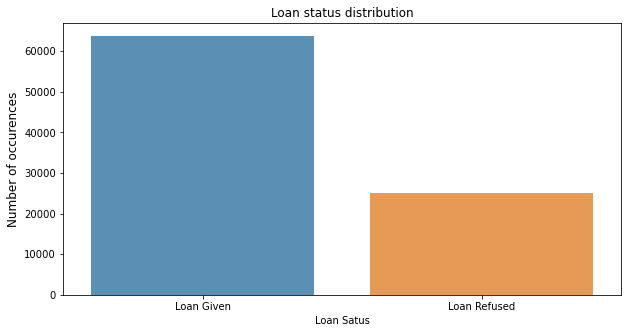

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(status.index,status.values,alpha=0.8)
plt.title('Loan status distribution')
plt.ylabel('Number of occurences',fontsize=12)
plt.xlabel('Loan Satus')
plt.show()

In [16]:
data['Current Loan Amount'].describe()

count    8.891000e+04
mean     1.433878e+07
std      3.502996e+07
min      4.910000e+02
25%      8.283000e+03
50%      1.435500e+04
75%      2.448500e+04
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

<AxesSubplot:ylabel='Frequency'>

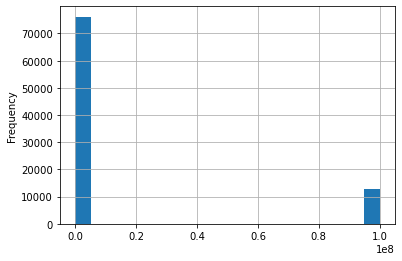

In [17]:
data['Current Loan Amount'].plot.hist(grid=True,bins=20)

In [21]:
x=np.percentile(data['Current Loan Amount'],q=[25,75])
print(x)

[ 8283. 24485.]


In [19]:
IQR=x[1]-x[0]
print(IQR)

16202.0


<AxesSubplot:xlabel='Term', ylabel='count'>

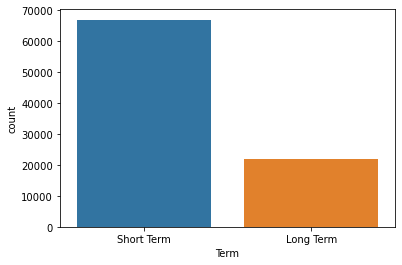

In [22]:
sns.countplot(data['Term'])

In [24]:
data['Credit Score'].isnull().sum()

21338

In [25]:
#Divide the values greater than 800 by 10
data['Credit Score']=np.where(data['Credit Score']>800,data['Credit Score']/10,data['Credit Score'])

In [26]:
median_credit=statistics.median(data['Credit Score'])
print(median_credit)

685.0


<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

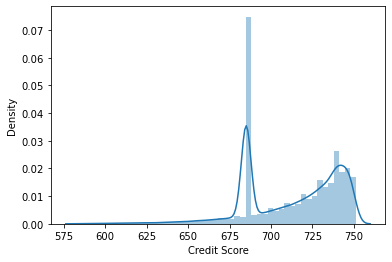

In [27]:
data['Credit Score'].fillna(median_credit,inplace =True)
sns.distplot(data['Credit Score'])

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

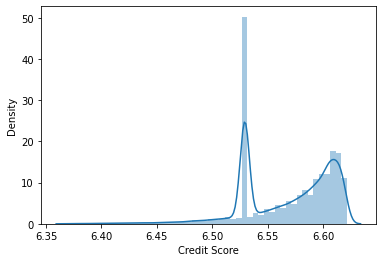

In [28]:
sns.distplot(np.log(data['Credit Score']))

In [29]:
data['Credit Score']=np.where(data['Credit Score']==685.0,741,data['Credit Score'])

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

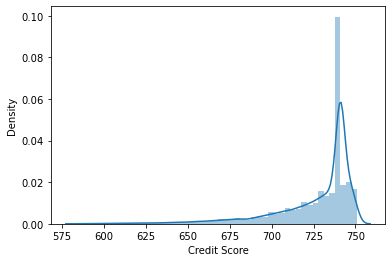

In [30]:
sns.distplot(data['Credit Score'])

In [31]:
data['Home Ownership'].unique()

array(['Rent', 'Home Mortgage', 'Own Home', 'HaveMortgage'], dtype=object)

In [32]:
data['Home Ownership']=data['Home Ownership'].str.replace('HaveMortgage','Home Mortgage',regex=True)

In [33]:
data['Annual Income'].describe()

count    6.757200e+04
mean     7.234575e+04
std      5.836101e+04
min      4.033000e+03
25%      4.458600e+04
50%      6.149400e+04
75%      8.675025e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

In [34]:
data['Annual Income'].quantile([0.25,0.50,0.75,0.99,0.999])

0.250     44586.00
0.500     61494.00
0.750     86750.25
0.990    239286.96
0.999    491575.77
Name: Annual Income, dtype: float64

In [35]:
data.loc[data['Annual Income']>239287,'Annual Income']=239287

In [36]:
data['Purpose'].value_counts()

Debt Consolidation      70447
Home Improvements        5206
other                    4917
Other                    2850
Business Loan            1328
Buy a Car                1196
Medical Bills             955
Buy House                 559
Take a Trip               454
major_purchase            344
small_business            248
moving                    124
wedding                    99
Educational Expenses       92
vacation                   82
renewable_energy            9
Name: Purpose, dtype: int64

In [38]:
data['Purpose']=data['Purpose'].str.replace('Other','other',regex=True)

In [39]:
data['Monthly Debt'].describe()

count     88910
unique    70066
top           0
freq         69
Name: Monthly Debt, dtype: object

<AxesSubplot:xlabel='Monthly Debt', ylabel='Density'>

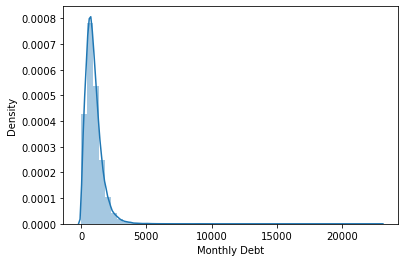

In [40]:
data['Monthly Debt']=data['Monthly Debt'].str.replace('$','',regex=True)
data['Monthly Debt']=pd.to_numeric(data['Monthly Debt'])
sns.distplot(data['Monthly Debt'])

In [42]:
data['Monthly Debt'].quantile([0.2,0.75,0.95,0.99,0.999])

0.200     463.75000
0.750    1250.52750
0.950    2115.51100
0.990    3087.11100
0.999    4926.37475
Name: Monthly Debt, dtype: float64

<AxesSubplot:xlabel='Monthly Debt', ylabel='Density'>

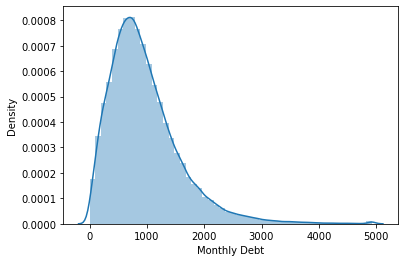

In [43]:
data.loc[data['Monthly Debt']>4926,'Monthly Debt']=4926
sns.distplot(data['Monthly Debt'])